# Training Progress

In [56]:
from torch_state_control.analysis import AnalysisPresenter
from networks.continuer import Continuer
from dataset_partitions import train_set, dev_set, test_set
from network_interface import NetworkInterface
import plotters

network = Continuer()
network.load_checkpoint(7)
network_interface = NetworkInterface(network=network)
analysis_presenter = AnalysisPresenter(name=network.name)

About the network:

In [2]:
print(network)

Continuer(
  (encoder): GRU(1, 20, num_layers=2, batch_first=True)
  (decoder): Sequential(
    (0): Linear(in_features=20, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)


Let's take a look at how the loss developed over all checkpoints.

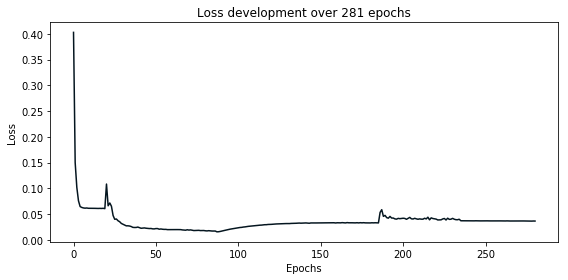

In [48]:
analysis_presenter.plot_loss(7)

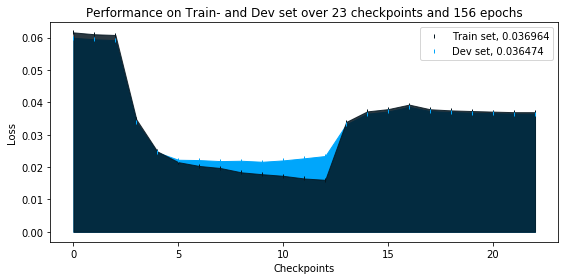

In [38]:
analysis_presenter.plot_performances()

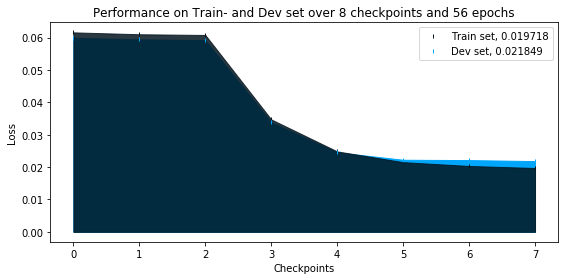

In [54]:
analysis_presenter.plot_performances(7)

In [55]:
analysis_presenter.plot_changelog(7)

### Changelog

#### Checkpoint #0

Adam learning_rate=0.001 weight_decay=0

#### Checkpoint #3

Adam learning_rate=0.01 weight_decay=0

In [69]:
predictions = network_interface.performance_on_samples(test_set)

Let's take a look at the loss for each single element.

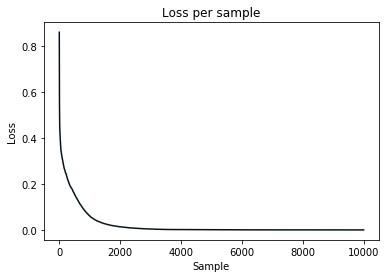

In [70]:
plotters.plot_loss_per_sample(predictions)

Apparantly the algorithm performs relatively well on the samples from 2000 to 10000 (80% of all samples). The **worst of these 80%** look like this:

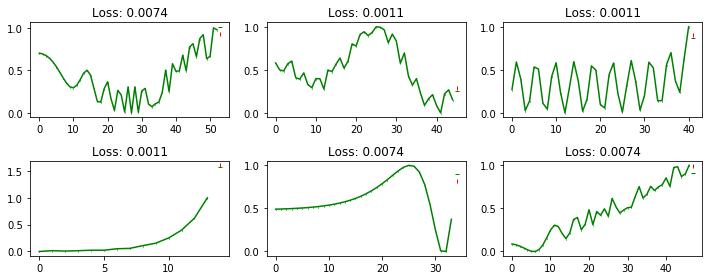

In [78]:
plotters.plot_samples([predictions[2500], predictions[4001], predictions[4002], predictions[4003], predictions[2504], predictions[2505]])

The samples the algorithm performs **best** on:

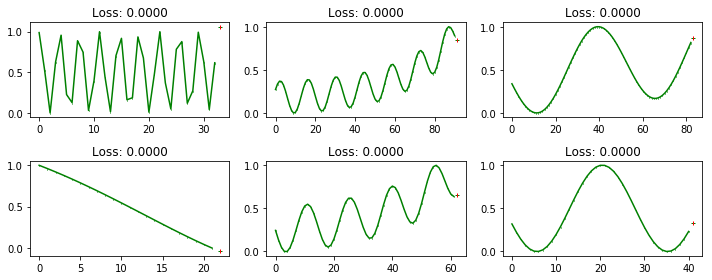

In [73]:
plotters.plot_samples([predictions[-1], predictions[-2], predictions[-3], predictions[-4], predictions[-5], predictions[-6]])

The samples the algorithm performs *worst* on:

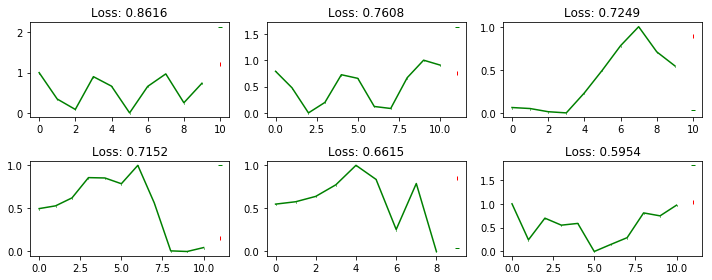

In [75]:
plotters.plot_samples([predictions[0], predictions[1], predictions[2], predictions[3], predictions[4], predictions[5]])